# 시각화 한글 폰트

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,500 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

## 위 코드 실행 후 런타임 재시작

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np

from tensorflow.keras.utils import get_file

from tqdm.notebook import tqdm

In [ ]:
train_fname = 'ratings_train.tsv'
test_fname = 'ratings_test.tsv'
train_origin = 'https://raw.github.com/e9t/nsmc/master/ratings_train.txt'
test_origin = 'https://raw.github.com/e9t/nsmc/master/ratings_test.txt'

train_path = get_file(train_fname, train_origin)
test_path = get_file(test_fname, test_origin)

In [ ]:
train_df = pd.read_csv(train_path, sep='\t') # tsv file
train_df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [ ]:
test_df = pd.read_csv(test_path, sep='\t') # tsv file
test_df.head()

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
print('Train data shape: ', train_df.shape)
n_lebel = len(train_df[train_df.label == 0])
print('Label 0 in Train data: {} ({:.1f}%)'.format(n_lebel, n_lebel*100/len(train_df)))
n_lebel = len(train_df[train_df.label == 1])
print('Label 1 in Train data: {} ({:.1f}%)'.format(n_lebel, n_lebel*100/len(train_df)))

print('\nTest data shape: ', test_df.shape)
n_lebel = len(test_df[test_df.label == 0])
print('Label 0 in Test data: {} ({:.1f}%)'.format(n_lebel, n_lebel*100/len(test_df)))
n_lebel = len(test_df[test_df.label == 1])
print('Label 1 in Test data: {} ({:.1f}%)'.format(n_lebel, n_lebel*100/len(test_df)))

Train data shape:  (150000, 3)
Label 0 in Train data: 75173 (50.1%)
Label 1 in Train data: 74827 (49.9%)

Test data shape:  (50000, 3)
Label 0 in Test data: 24827 (49.7%)
Label 1 in Test data: 25173 (50.3%)


# 데이터 전처리

## 결측치 제거

In [ ]:
train_df.isnull().any()

id          False
document     True
label       False
dtype: bool

In [ ]:
test_df.isnull().any()

id          False
document     True
label       False
dtype: bool

## 중복 제거

In [ ]:
train_df = train_df.dropna(axis=0).reset_index(drop=True)
test_df = test_df.dropna(axis=0).reset_index(drop=True)

In [ ]:
train_df['document'].nunique(), test_df['document'].nunique() 

(146182, 49157)

In [ ]:
train_df.drop_duplicates(subset=['document'], inplace=True)
test_df.drop_duplicates(subset=['document'], inplace=True)

In [ ]:
print('Train data shape: ', train_df.shape)
print('Test data shape: ', test_df.shape)

Train data shape:  (146182, 3)
Test data shape:  (49157, 3)


## 특수 문자 제거

In [ ]:
train_df['document'] = train_df['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ|가-힣 ]', '', regex=True)

In [ ]:
train_df['document'][:5]

0                                    아 더빙 진짜 짜증나네요 목소리
1                           흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나
2                                    너무재밓었다그래서보는것을추천한다
3                            교도소 이야기구먼 솔직히 재미는 없다평점 조정
4    사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...
Name: document, dtype: object

In [ ]:
train_df['document'] = train_df['document'].str.replace('^ +', "", regex=True) # white space 데이터를 empty value로 변경
train_df['document'].replace('', np.nan, inplace=True)
print(train_df.isnull().sum())

id            0
document    789
label         0
dtype: int64


In [ ]:
train_df.loc[train_df.document.isnull()][:5]

,id,document,label
404,4221289,NaN,0
412,9509970,NaN,1
470,10147571,NaN,1
584,7117896,NaN,0
593,6478189,NaN,0


In [ ]:
train_df = train_df.dropna(how='any')

In [ ]:
print('Train data shape: ', train_df.shape)

Train data shape:  (145393, 3)


In [ ]:
test_df.drop_duplicates(subset = ['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
test_df['document'] = test_df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","", regex=True) # 정규 표현식 수행
test_df['document'] = test_df['document'].str.replace('^ +', "", regex=True) # 공백은 empty 값으로 변경
test_df['document'].replace('', np.nan, inplace=True) # 공백은 Null 값으로 변경
test_df = test_df.dropna(how='any') # Null 값 제거

In [ ]:
print('Test data shape: ', test_df.shape)

Test data shape:  (48852, 3)


## 레이블 분포 확인

In [ ]:
train_df['label'].value_counts()

0    73043
1    72350
Name: label, dtype: int64

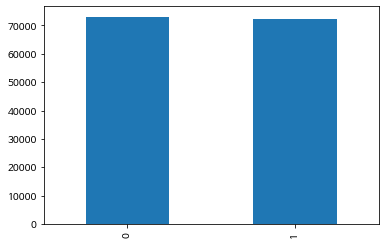

In [ ]:
train_df['label'].value_counts().plot(kind='bar')

In [ ]:
train_df = train_df[['document', 'label']]
test_df = test_df[['document', 'label']]

In [ ]:
train_df.head()

,document,label
0,아 더빙 진짜 짜증나네요 목소리,0
1,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,너무재밓었다그래서보는것을추천한다,0
3,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


# 토큰화 - 형태소 분석

In [ ]:
!pip install konlpy

In [ ]:
from konlpy.tag import Okt

okt = Okt()

In [ ]:
# 불용어(stopword) 제거
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
X_train = []
for sentence in tqdm(train_df['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [ ]:
X_test = []
for sentence in tqdm(test_df['document']):
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

# Word2Vec

In [ ]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [ ]:
# 파라메터값 지정
num_features = 300 # 문자 벡터 차원 수
min_word_count = 40 # 최소 문자 수
num_workers = 4 # 병렬 처리 스레드 수
context = 10 # 문자열 창 크기
downsampling = 1e-3 # 문자 빈도 수 Downsample

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(X_train, 
                          workers=num_workers, 
                          size=num_features, 
                          min_count=min_word_count,
                          window=context,
                          sample=downsampling)
model

2021-04-29 03:38:44,879 : INFO : 'pattern' package not found; tag filters are not available for English
2021-04-29 03:38:44,894 : INFO : collecting all words and their counts
2021-04-29 03:38:44,895 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-04-29 03:38:44,932 : INFO : PROGRESS: at sentence #10000, processed 110531 words, keeping 12446 word types
2021-04-29 03:38:44,965 : INFO : PROGRESS: at sentence #20000, processed 219028 words, keeping 17523 word types
2021-04-29 03:38:45,000 : INFO : PROGRESS: at sentence #30000, processed 330040 words, keeping 21238 word types
2021-04-29 03:38:45,041 : INFO : PROGRESS: at sentence #40000, processed 441559 words, keeping 24395 word types
2021-04-29 03:38:45,078 : INFO : PROGRESS: at sentence #50000, processed 550897 words, keeping 27025 word types
2021-04-29 03:38:45,123 : INFO : PROGRESS: at sentence #60000, processed 660576 words, keeping 29304 word types
2021-04-29 03:38:45,167 : INFO : PROGRESS: at sentence

In [ ]:
# 학습이 완료 되면 필요없는 메모리를 unload 시킨다.
model.init_sims(replace=True)

model_name = '300features_40minwords_10text'
# model_name = '300features_50minwords_20text'
model.save(model_name)

2021-04-29 03:39:03,829 : INFO : precomputing L2-norms of word weight vectors
2021-04-29 03:39:03,879 : INFO : saving Word2Vec object under 300features_40minwords_10text, separately None
2021-04-29 03:39:03,881 : INFO : not storing attribute vectors_norm
2021-04-29 03:39:03,884 : INFO : not storing attribute cum_table
2021-04-29 03:39:03,998 : INFO : saved 300features_40minwords_10text


In [ ]:
model.wv.most_similar('영화')

[('다큐멘터리', 0.5138540267944336),
 ('독립영화', 0.4581809639930725),
 ('다큐', 0.4528287351131439),
 ('이영화', 0.4475353956222534),
 ('영화로', 0.42842578887939453),
 ('애니메이션', 0.4245448708534241),
 ('작품', 0.4118720293045044),
 ('수작', 0.41181743144989014),
 ('공포영화', 0.4078783392906189),
 ('애니', 0.405705064535141)]

# t-sne

In [ ]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '300features_40minwords_10text'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

2021-04-29 03:39:04,536 : INFO : loading Doc2Vec object from 300features_40minwords_10text
2021-04-29 03:39:05,148 : INFO : loading wv recursively from 300features_40minwords_10text.wv.* with mmap=None
2021-04-29 03:39:05,158 : INFO : setting ignored attribute vectors_norm to None
2021-04-29 03:39:05,160 : INFO : loading vocabulary recursively from 300features_40minwords_10text.vocabulary.* with mmap=None
2021-04-29 03:39:05,164 : INFO : loading trainables recursively from 300features_40minwords_10text.trainables.* with mmap=None
2021-04-29 03:39:05,166 : INFO : setting ignored attribute cum_table to None
2021-04-29 03:39:05,169 : INFO : loaded 300features_40minwords_10text
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


3683
[ 0.04940454  0.04999845  0.01424085 -0.01338056  0.06996715  0.07848969
  0.02739744 -0.00947231 -0.21696056  0.03914851]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [ ]:
df.head(10)

,x,y
아,24.811230,-10.159389
더빙,-0.126812,-20.137238
진짜,15.094368,-30.135136
짜증나다,19.692247,-3.546234
목소리,-1.308924,-15.541859
흠,-25.647345,20.138632
포스터,7.588815,-12.434180
보고,10.572411,28.840784
초딩,24.218826,10.826281
영화,-9.093802,31.608349


In [ ]:
import warnings
warnings.filterwarnings('ignore')

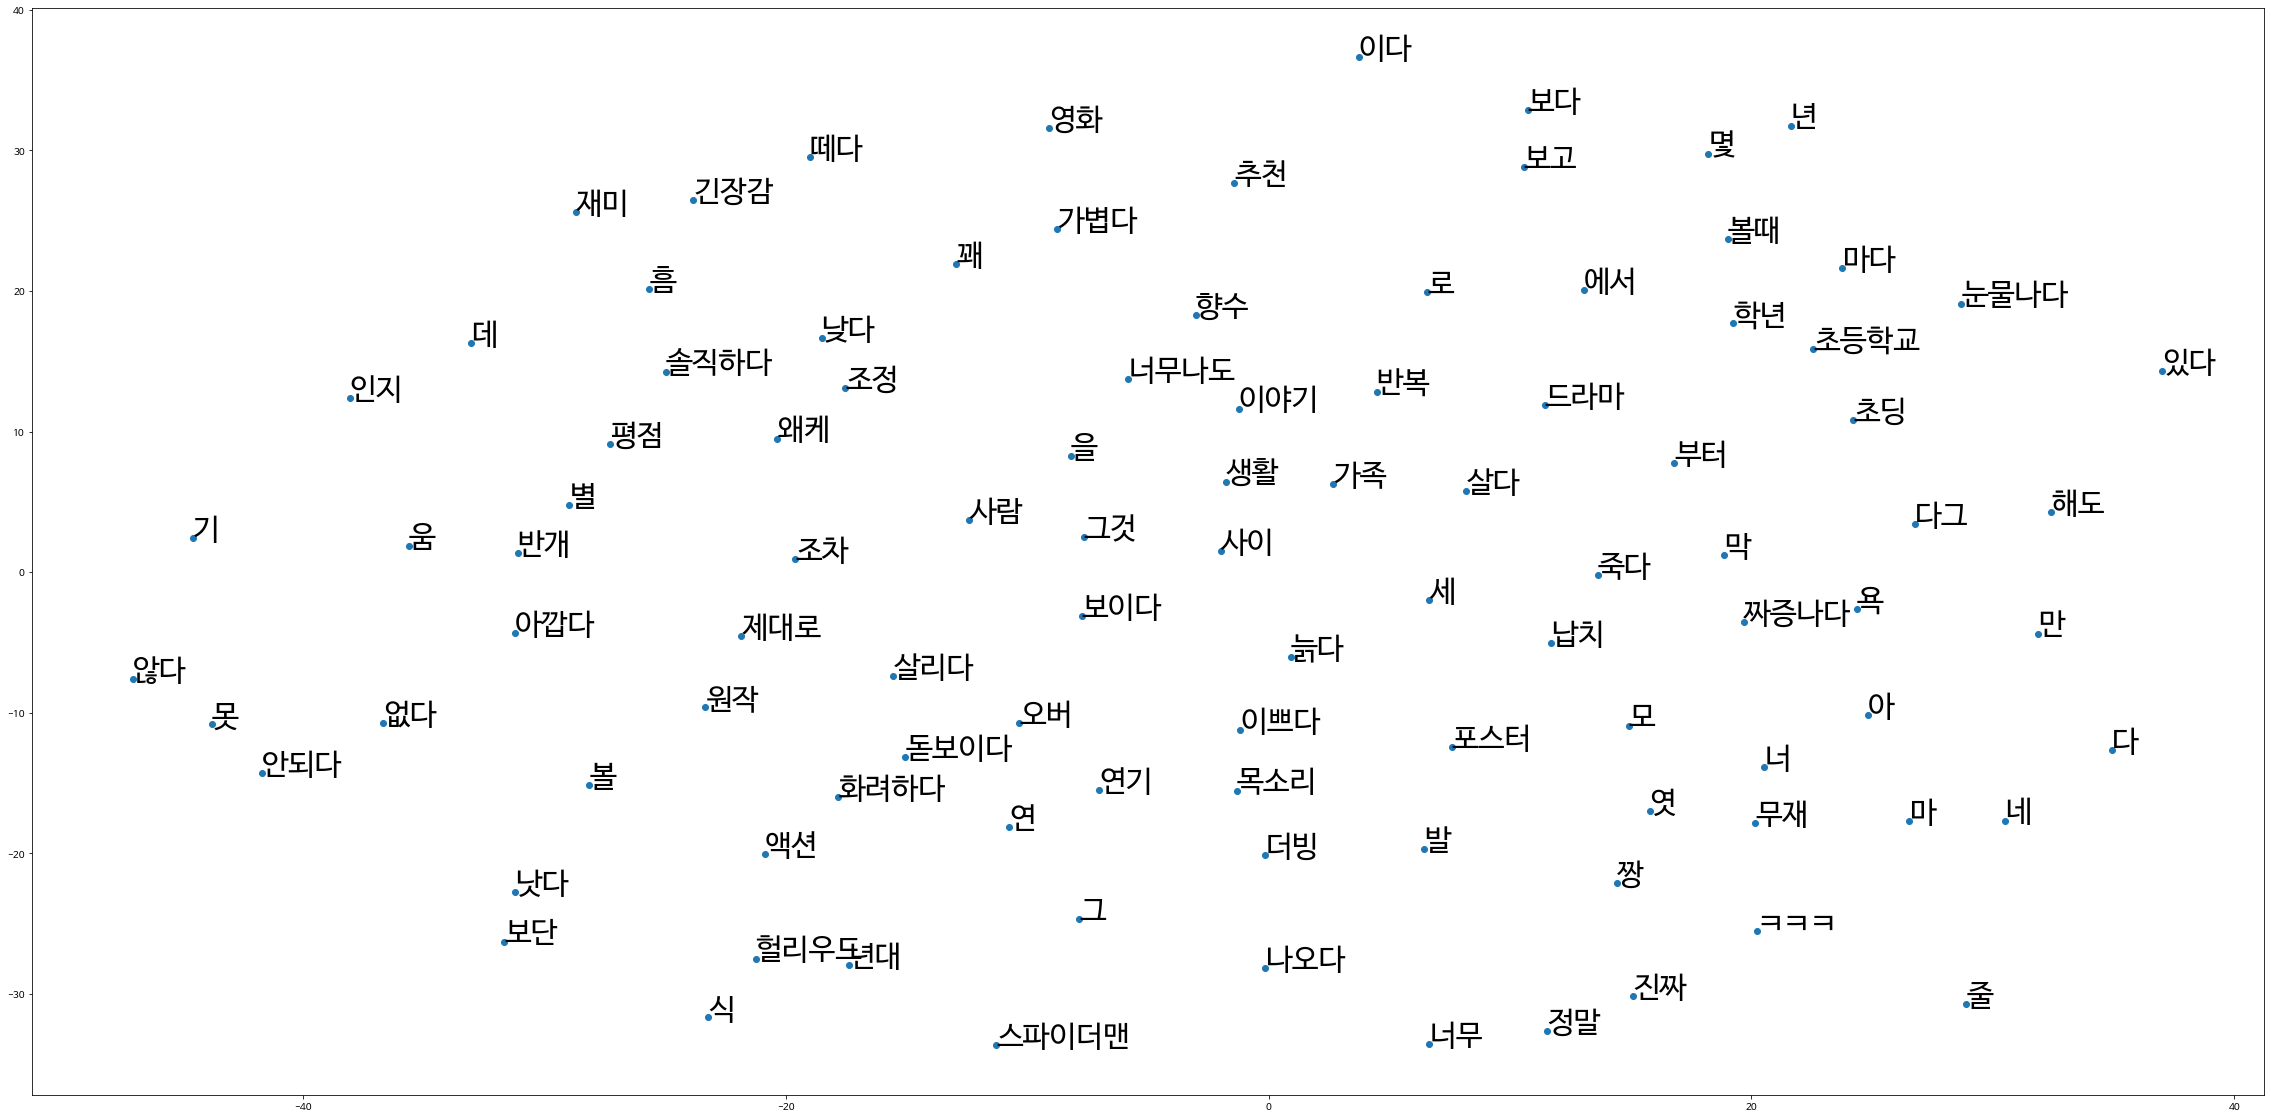

In [ ]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()